In [6]:
!ls "/home/mlepekhin/train_frames_big/02NAI-ykpWk/"

0.jpg	 115.jpg  130.jpg  14.jpg  2.jpg   45.jpg  60.jpg  76.jpg  91.jpg
100.jpg  116.jpg  131.jpg  15.jpg  30.jpg  46.jpg  61.jpg  77.jpg  92.jpg
101.jpg  117.jpg  132.jpg  16.jpg  31.jpg  47.jpg  62.jpg  78.jpg  93.jpg
102.jpg  118.jpg  133.jpg  17.jpg  32.jpg  48.jpg  63.jpg  79.jpg  94.jpg
103.jpg  119.jpg  134.jpg  18.jpg  33.jpg  49.jpg  64.jpg  7.jpg   95.jpg
104.jpg  11.jpg   135.jpg  19.jpg  34.jpg  4.jpg   65.jpg  80.jpg  96.jpg
105.jpg  120.jpg  136.jpg  1.jpg   35.jpg  50.jpg  66.jpg  81.jpg  97.jpg
106.jpg  121.jpg  137.jpg  20.jpg  36.jpg  51.jpg  67.jpg  82.jpg  98.jpg
107.jpg  122.jpg  138.jpg  21.jpg  37.jpg  52.jpg  68.jpg  83.jpg  99.jpg
108.jpg  123.jpg  139.jpg  22.jpg  38.jpg  53.jpg  69.jpg  84.jpg  9.jpg
109.jpg  124.jpg  13.jpg   23.jpg  39.jpg  54.jpg  6.jpg   85.jpg
10.jpg	 125.jpg  140.jpg  24.jpg  3.jpg   55.jpg  70.jpg  86.jpg
110.jpg  126.jpg  141.jpg  25.jpg  40.jpg  56.jpg  71.jpg  87.jpg
111.jpg  127.jpg  142.jpg  26.jpg  41.jpg  57.jpg  72.jpg  88.jpg


In [36]:
flow = compute_flow("/home/mlepekhin/train_frames_big/02NAI-ykpWk/0.jpg", "/home/mlepekhin/train_frames_big/02NAI-ykpWk/1.jpg")

In [42]:
def process_video(video_arg):
    source_video, target_dir, box_relative_coord = video_arg
    
    vidcap = cv2.VideoCapture(source_video)

#     success,image = vidcap.read()
    success = True
    count = 0

    while success:
        success,image = vidcap.read()
        if success:
            height, width = image.shape[0], image.shape[1]
            top = round(box_relative_coord[0] * height)
            left = round(box_relative_coord[1] * width)
            bottom = round(box_relative_coord[2] * height)
            right = round(box_relative_coord[3] * width)
            image = image[top:bottom, left:right]
            
            image = cv2.resize(image, (224, 224))
            cv2.imwrite(target_dir + '/' + str(count) + '.jpg', image)     # save frame as JPEG file
        if not success:
            print("not success", count)
            print(image)
        count += 1
        


In [ ]:
# !mkdir /home/mlepekhin/train_frames_https
# !mkdir /home/mlepekhin/train_frames_https

In [35]:
cap = cv2.VideoCapture('/home/mlepekhin/train/bDjiZ9Ngcfg.mp4')
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print( length )

61


In [38]:
cap.get(cv2.CAP_PROP_FPS)

25.0

In [39]:
!pwd

/home/vivanin/clones/inteligenceSystemsProject


In [43]:
process_video(['/home/mlepekhin/train/bDjiZ9Ngcfg.mp4', 
               'test', 
               [0.0671529471874237, 0.28108179569244385, 1.0, 0.6669063568115234]
              ])

not success 61
None


In [22]:
!cp /home/mlepekhin/train/bDjiZ9Ngcfg.mp4 test/

In [44]:
!ls test | wc

     62      62     433


In [4]:
!ls /home/mlepekhin/train_frames_big/bDjiZ9Ngcfg/ | wc

     61      61     417


In [1]:
from split_frames import process_directory

In [2]:
process_directory('/home/mlepekhin/train', '/home/mlepekhin/train_frames_big', '/home/mlepekhin/MSASL_train.json')

100%|██████████| 984/984 [00:00<00:00, 22635.48it/s]


In [3]:
process_directory('/home/mlepekhin/test', '/home/mlepekhin/test_frames_big', '/home/mlepekhin/MSASL_test.json')
process_directory('/home/mlepekhin/val', '/home/mlepekhin/val_frames_big', '/home/mlepekhin/MSASL_val.json')

100%|██████████| 305/305 [00:00<00:00, 17183.07it/s]


100%|██████████| 250/250 [00:00<00:00, 33652.43it/s]


In [5]:
import cv2
#flow[:,:,0]

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [57]:
flow[:,:,1].min()

-0.02028934

In [58]:
redone = np.stack([flow[:,:,1], flow[:,:,1], flow[:,:,1]]).transpose(1, 2, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


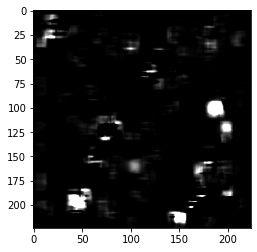

In [53]:
plt.imshow(redone)

In [17]:
im = Image.fromarray(flow[:,:,0])

In [5]:
!mkdir "/home/mlepekhin/train_frames_big/flow"

In [6]:
!mkdir "/home/mlepekhin/train_frames_big/flow/u"

In [7]:
!mkdir "/home/mlepekhin/train_frames_big/flow/v"

In [18]:
import os
import cv2
import numpy as np
# from pythonFlowCompute.compute_flow import compute_flow
from PIL import Image


def compute_flow(impath_1, impath_2):
#     print(impath_1)
    first_frame = cv2.imread(impath_1)

    if first_frame is None:
        print("Error reading frame:", impath_1)
        return None

    resize_dim = 224
    max_dim = max(first_frame.shape)
    scale = resize_dim/max_dim

    first_frame = cv2.resize(first_frame, None, fx=scale, fy=scale)
    prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)

    second_frame = cv2.imread(impath_2)

    resize_dim = 224
    max_dim = max(second_frame.shape)
    scale = resize_dim/max_dim

    second_frame = cv2.resize(second_frame, None, fx=scale, fy=scale)
    next_gray = cv2.cvtColor(second_frame, cv2.COLOR_BGR2GRAY)



    flow = cv2.calcOpticalFlowFarneback(prev_gray, next_gray, None, 
                                        pyr_scale = 0.5, 
                                        levels = 5, 
                                        winsize = 11, 
                                        iterations = 5, 
                                        poly_n = 5, 
                                        poly_sigma = 1.1, 
                                        flags = 0)

    return flow

def create_flow_for_dir(base_path, dirname):
    global p
    
    dirpath = os.path.join(base_path, dirname)
    
    flowdir_u = os.path.join(os.path.join(os.path.join(base_path, "flow"), "u"), dirname)
#     print(flowdir_u)
    if not os.path.exists(flowdir_u):
        os.mkdir(flowdir_u)
    
    flowdir_v = os.path.join(os.path.join(os.path.join(base_path, "flow"), "v"), dirname)
#     print(flowdir_v)
    if not os.path.exists(flowdir_v):
        os.mkdir(flowdir_v)
    
    n = len(os.listdir(dirpath))
    
    def calc_flow_for_idx(i):
        next_frame = i + 1
        file1 = os.path.join(dirpath, f"{i}.jpg")
        file2 = os.path.join(dirpath, f"{next_frame}.jpg")
        
        flow = compute_flow(file1, file2)
        if flow is None:
            print("Error flow in", file1)
            return
        
        def scale_flow(fl):
            scaled_flow = fl
            div = (scaled_flow.max() - scaled_flow.min())
            div = div if not np.isclose(div, 0) else 1 
            return  255 * (scaled_flow - scaled_flow.min()) / div 
        
        scaled_flow = scale_flow(flow[:, :, 0])
        im = Image.fromarray(scaled_flow)
        im = im.convert('L')
        flow_u = os.path.join(flowdir_u, f"{i}.jpg")
        im.save(flow_u)
        
        scaled_flow = scale_flow(flow[:, :, 1])
        im = Image.fromarray(scaled_flow)
#         if im.mode != 'RGB':
        im = im.convert('L')
        flow_v = os.path.join(flowdir_v, f"{i}.jpg")
        im.save(flow_v)
    
    p.map(calc_flow_for_idx, range(n - 1))
    
#     for i in range(n - 1):
        

In [22]:
import cv2
im = cv2.imread("/home/mlepekhin/train_frames_big/AGm3ZL-ly0A/40.jpg")

In [8]:
from matplotlib import pyplot as plt

In [37]:
# np.isclose

In [36]:
create_flow_for_dir("/home/mlepekhin/train_frames_big/", "58HG2sIrxS0")

/home/mlepekhin/train_frames_big/58HG2sIrxS0/0.jpg/home/mlepekhin/train_frames_big/58HG2sIrxS0/1.jpg

/home/mlepekhin/train_frames_big/58HG2sIrxS0/2.jpg/home/mlepekhin/train_frames_big/58HG2sIrxS0/3.jpg
/home/mlepekhin/train_frames_big/58HG2sIrxS0/4.jpg
/home/mlepekhin/train_frames_big/58HG2sIrxS0/5.jpg
/home/mlepekhin/train_frames_big/58HG2sIrxS0/6.jpg
/home/mlepekhin/train_frames_big/58HG2sIrxS0/7.jpg
/home/mlepekhin/train_frames_big/58HG2sIrxS0/8.jpg
/home/mlepekhin/train_frames_big/58HG2sIrxS0/9.jpg
/home/mlepekhin/train_frames_big/58HG2sIrxS0/10.jpg
/home/mlepekhin/train_frames_big/58HG2sIrxS0/11.jpg
/home/mlepekhin/train_frames_big/58HG2sIrxS0/12.jpg
/home/mlepekhin/train_frames_big/58HG2sIrxS0/13.jpg
/home/mlepekhin/train_frames_big/58HG2sIrxS0/14.jpg
/home/mlepekhin/train_frames_big/58HG2sIrxS0/15.jpg
/home/mlepekhin/train_frames_big/58HG2sIrxS0/16.jpg
/home/mlepekhin/train_frames_big/58HG2sIrxS0/17.jpg
/home/mlepekhin/train_frames_big/58HG2sIrxS0/18.jpg
/home/mlepekhin/train_f

In [31]:
!ls /home/mlepekhin/train_frames_big/flow/u/AGm3ZL-ly0A

ls: cannot access '/home/mlepekhin/train_frames_big/flow/u/AGm3ZL-ly0A': No such file or directory


In [20]:
# !ls /home/mlepekhin/train_frames_big/

In [9]:
train_dir = "/home/mlepekhin/train_frames_big/"

In [5]:
# import time

# for i in tqdm(range(10)):
#     time.sleep(0.1)

In [13]:
from multiprocessing.pool import ThreadPool
from tqdm import tqdm
p = ThreadPool(30)

In [11]:
!mkdir "/home/mlepekhin/train_frames_big/flow"
!mkdir "/home/mlepekhin/train_frames_big/flow/u"
!mkdir "/home/mlepekhin/train_frames_big/flow/v"

mkdir: cannot create directory ‘/home/mlepekhin/train_frames_big/flow’: File exists
mkdir: cannot create directory ‘/home/mlepekhin/train_frames_big/flow/u’: File exists
mkdir: cannot create directory ‘/home/mlepekhin/train_frames_big/flow/v’: File exists


In [19]:
for subdir in tqdm(os.listdir(train_dir)):
    if subdir != "flow":
        flowdir_u = os.path.join(os.path.join(os.path.join(train_dir, "flow"), "u"), subdir)
        flowdir_v = os.path.join(os.path.join(os.path.join(train_dir, "flow"), "v"), subdir)
        if not os.path.exists(flowdir_u) or not os.path.exists(flowdir_v):
            create_flow_for_dir(train_dir, subdir)

100%|██████████| 985/985 [2:33:16<00:00,  9.34s/it]  


In [20]:
test_dir = "/home/mlepekhin/test_frames_big/"

In [21]:
!mkdir "/home/mlepekhin/test_frames_big/flow"
!mkdir "/home/mlepekhin/test_frames_big/flow/u"
!mkdir "/home/mlepekhin/test_frames_big/flow/v"

In [22]:
for subdir in tqdm(os.listdir(test_dir)):
    if subdir != "flow":
        flowdir_u = os.path.join(os.path.join(os.path.join(test_dir, "flow"), "u"), subdir)
        if not os.path.exists(flowdir_u):
            create_flow_for_dir(test_dir, subdir)

100%|██████████| 306/306 [37:32<00:00,  7.36s/it]  


In [23]:
val_dir = "/home/mlepekhin/val_frames_big//"

In [24]:
!mkdir "/home/mlepekhin/val_frames_big/flow"
!mkdir "/home/mlepekhin/val_frames_big/flow/u"
!mkdir "/home/mlepekhin/val_frames_big/flow/v"

In [25]:
for subdir in tqdm(os.listdir(val_dir)):
    if subdir != "flow":
        flowdir_u = os.path.join(os.path.join(os.path.join(test_dir, "flow"), "u"), subdir)
        if not os.path.exists(flowdir_u):
            create_flow_for_dir(val_dir, subdir)

100%|██████████| 251/251 [44:19<00:00, 10.60s/it]  


In [26]:
!ls /home/mlepekhin/train_frames_big/Fef0GDkOO6k | wc

    943     943    7434


In [34]:
!ls /home/mlepekhin/train_frames_big/flow/v/nwQh3qvE4EA/ | wc

    942     942    7426


In [35]:
create_flow_for_dir(train_dir, 'nwQh3qvE4EA')

In [36]:
csv_file = 'result.csv'

In [ ]:
category2idx = dict()

names = []
pred_labels = []
true_labels = []

with open(csv_file) as f:
    for line in f.readlines():
        dirname, label, true_label = f.split(';')
        names.append(dirname)
        if label not in category2idx:
            newIdx = len(category2idx)
            category2idx[label] = newIdx
        
        if true_label not in category2idx:
            newIdx = len(category2idx)
            category2idx[true_label] = newIdx
        
        pred_labels.append(category2idx[label])
        true_labels.append(category2idx[true_label])
        
idx2category = {idx:name for name, idx in category2idx.items()}

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(true_labels, pred_labels)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

In [37]:
for idx, acc in enumerate(cm.diagonal()):
    print(idx2category[idx], acc)

NameError: name 'cm' is not defined